<a href="https://colab.research.google.com/github/Aqfa07/ML-Project/blob/main/Project%20007%3A%20Learning%20Rate%20Scheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - loss: 180.6293 - mae: 12.5779 - val_loss: 453.8276 - val_mae: 21.2462 - learning_rate: 1.0000e-03
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 160.5659 - mae: 11.9341 - val_loss: 443.0375 - val_mae: 20.9901 - learning_rate: 2.0000e-04
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 163.3116 - mae: 11.9850 - val_loss: 439.7783 - val_mae: 20.9121 - learning_rate: 6.0000e-05
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 159.3724 - mae: 11.8432 - val_loss: 438.4778 - val_mae: 20.8810 - learning_rate: 2.4000e-05
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 158.8077 - mae: 11.8016 - val_loss: 437.8250 - val_mae: 20.8653 - learning_rate: 1.2000e-05
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 170.8769 - mae: 12.2523 - val_loss: 437.4302 - val_mae: 20.8558 - learning_rate: 7.2000e-06
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 160.5819 - mae: 11.9546 - val_loss: 437.1

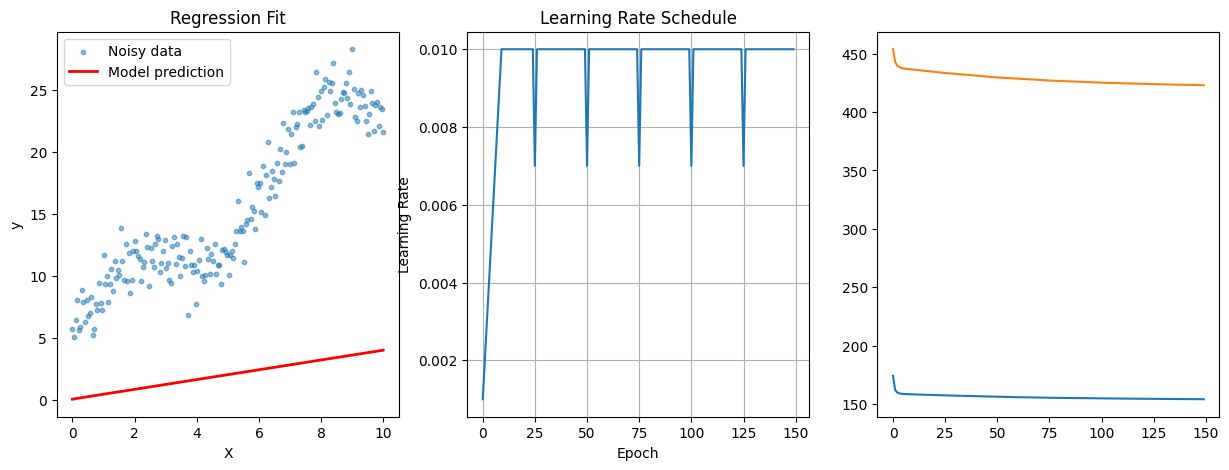

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic regression data with more complex pattern
np.random.seed(42)
X = np.linspace(0, 10, 200).reshape(-1, 1).astype(np.float32)
y = 3 * np.sin(X) + 2 * X + 5 + np.random.randn(*X.shape) * 1.5  # Non-linear relationship with noise

# Define a more sophisticated learning rate scheduler
def lr_scheduler(epoch, lr):
    """Learning rate schedule that combines step decay and warmup"""
    warmup_epochs = 10
    if epoch < warmup_epochs:  # Linear warmup
        return lr * (epoch + 1) / warmup_epochs
    elif epoch % 25 == 0 and epoch:  # Exponential decay every 25 epochs
        return lr * 0.7
    return lr

# Create a more capable model for the non-linear data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Linear output for regression
])

# Compile with Adam optimizer and MSE loss
initial_lr = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
history_callback = tf.keras.callbacks.History()

# Train the model
history = model.fit(
    X, y,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[lr_callback, history_callback],
    verbose=1
)

# Visualization
plt.figure(figsize=(15, 5))

# Plot 1: Data and predictions
plt.subplot(1, 3, 1)
plt.scatter(X, y, s=10, alpha=0.5, label='Noisy data')
plt.plot(X, model.predict(X), 'r-', linewidth=2, label='Model prediction')
plt.title('Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Plot 2: Learning rate schedule
plt.subplot(1, 3, 2)
lrs = [lr_scheduler(e, initial_lr) for e in range(150)]
plt.plot(lrs)
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)

# Plot 3: Training metrics
plt.subplot(1, 3, 3)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')